In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

InceptionResNetV2

2025-08-16 10:06:47.388336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755338807.750723      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755338807.855449      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 4160 images belonging to 13 classes.
Found 1040 images belonging to 13 classes.


I0000 00:00:1755338829.509000      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755338829.509758      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1755338864.057857     110 service.cc:148] XLA service 0x79e4780d5300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755338864.059931     110 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755338864.059953     110 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755338868.650255     110 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1755338878.390662     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.0968 - loss: 2.7527
Epoch 1: accuracy improved from -inf to 0.11226, saving model to inceptionresnetv2_paddy.h5
130/130 ━━━━━━━━━━━━━━━━━━━━ 117s 593ms/step - accuracy: 0.0969 - loss: 2.7517 - learning_rate: 1.0000e-04
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.1632 - loss: 2.4727
Epoch 2: accuracy improved from 0.11226 to 0.16370, saving model to inceptionresnetv2_paddy.h5
130/130 ━━━━━━━━━━━━━━━━━━━━ 52s 402ms/step - accuracy: 0.1632 - loss: 2.4726 - learning_rate: 1.0000e-04
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.1939 - loss: 2.3884
Epoch 3: accuracy improved from 0.16370 to 0.19471, saving model to inceptionresnetv2_paddy.h5
130/130 ━━━━━━━━━━━━━━━━━━━━ 52s 399ms/step - accuracy: 0.1939 - loss: 2.3883 - learning_rate: 1.0000e-04
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.2186 - loss: 2.3398
Epoch 4: accuracy improved from 0.19471 to 0.22476, saving

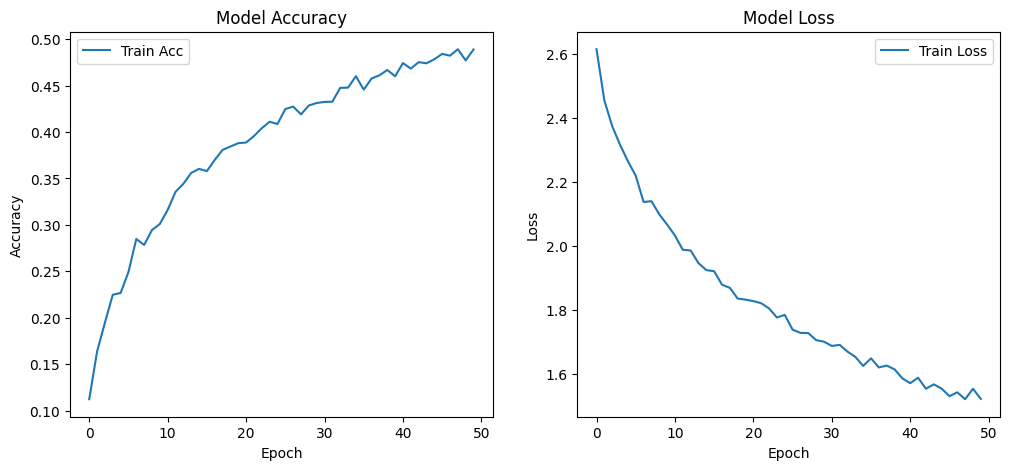

33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 789ms/step
Classification Report:
                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.49      0.64      0.55        80
   bacterial_leaf_streak       0.62      0.62      0.62        80
bacterial_panicle_blight       0.76      0.81      0.79        80
        black_stem_borer       0.83      0.62      0.71        80
                   blast       0.52      0.59      0.55        80
              brown_spot       0.55      0.36      0.44        80
            downy_mildew       0.57      0.55      0.56        80
                   hispa       0.34      0.56      0.43        80
             leaf_roller       0.58      0.38      0.45        80
                  normal       0.59      0.60      0.59        80
                  tungro       0.51      0.44      0.47        80
        white_stem_borer       0.67      0.56      0.61        80
       yellow_stem_borer       0.72      0.80      0.76        80

         

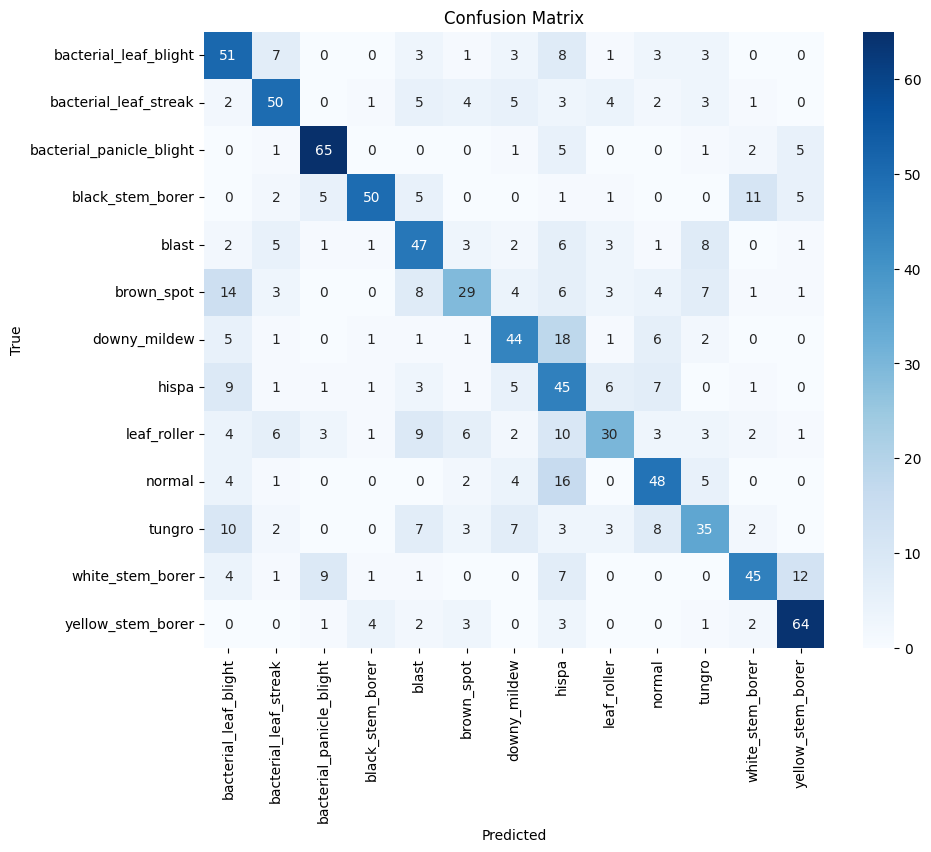

In [1]:
# ===============================
# InceptionResNetV2 Transfer Learning for Paddy Dataset
# ===============================

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# =====================
# Paths
# =====================
data_path = "/kaggle/input/paddy-leaf-small/Small-80"
train_dir = os.path.join(data_path, "train")
test_dir = os.path.join(data_path, "test")

# =====================
# Data Augmentation
# =====================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_gen.num_classes

# =====================
# Model: InceptionResNetV2
# =====================
base_model = InceptionResNetV2(
    weights="imagenet", include_top=False, input_shape=(224,224,3)
)
base_model.trainable = False   # First freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(128, activation = "relu")(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

# =====================
# Compile
# =====================
model.compile(optimizer=Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

# =====================
# Callbacks
# =====================
callbacks = [
    ReduceLROnPlateau(monitor="loss", factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor="loss", patience=8, restore_best_weights=True),
    ModelCheckpoint("inceptionresnetv2_paddy.h5", save_best_only=True, monitor="accuracy", mode="max", verbose=1)
]

# =====================
# Training
# =====================
history = model.fit(
    train_gen,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

# =====================
# Curves: Accuracy & Loss
# =====================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# =====================
# Evaluation on Test Set
# =====================
test_preds = model.predict(test_gen)
y_pred = np.argmax(test_preds, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Xception

Found 4160 images belonging to 13 classes.
Found 1040 images belonging to 13 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


E0000 00:00:1755342736.065766     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1755342736.205665     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.0987 - loss: 2.5560
Epoch 1: accuracy improved from -inf to 0.13077, saving model to xception_paddy.h5
130/130 ━━━━━━━━━━━━━━━━━━━━ 88s 442ms/step - accuracy: 0.0990 - loss: 2.5555 - learning_rate: 1.0000e-04
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.3096 - loss: 2.0585
Epoch 2: accuracy improved from 0.13077 to 0.37500, saving model to xception_paddy.h5
130/130 ━━━━━━━━━━━━━━━━━━━━ 59s 453ms/step - accuracy: 0.3101 - loss: 2.0572 - learning_rate: 1.0000e-04
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.5160 - loss: 1.4823
Epoch 3: accuracy improved from 0.37500 to 0.53582, saving model to xception_paddy.h5
130/130 ━━━━━━━━━━━━━━━━━━━━ 58s 441ms/step - accuracy: 0.5162 - loss: 1.4817 - learning_rate: 1.0000e-04
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.6102 - loss: 1.1816
Epoch 4: accuracy improved from 0.53582 to 0.62452, saving model to xception_paddy.h5


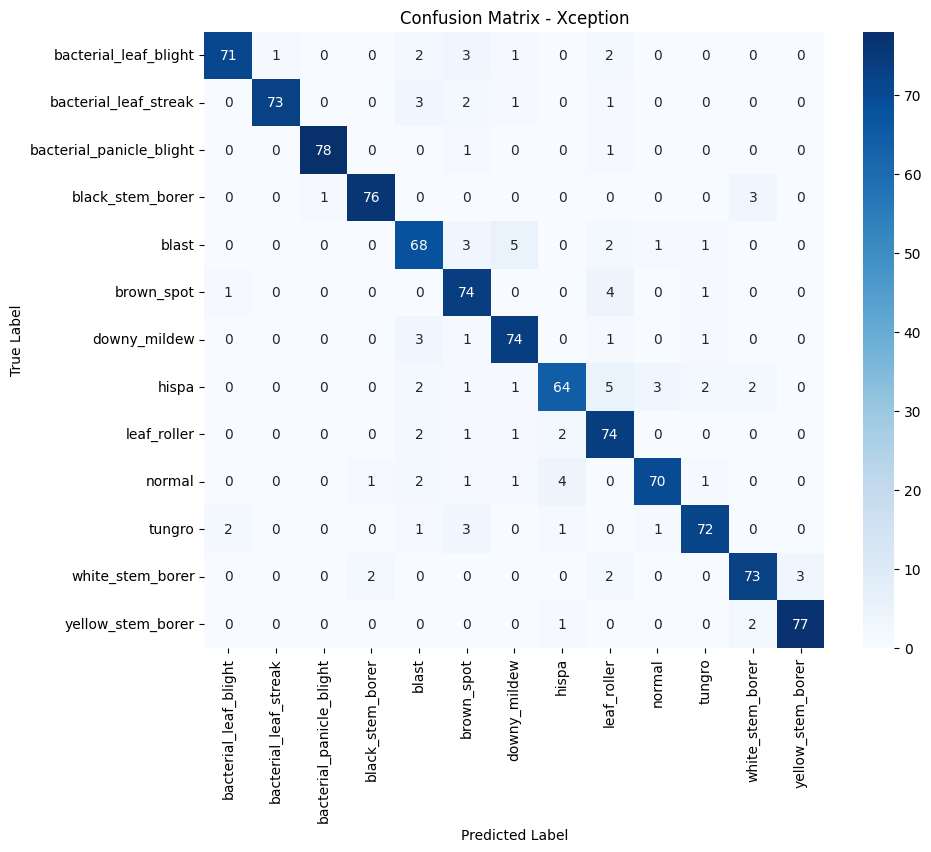

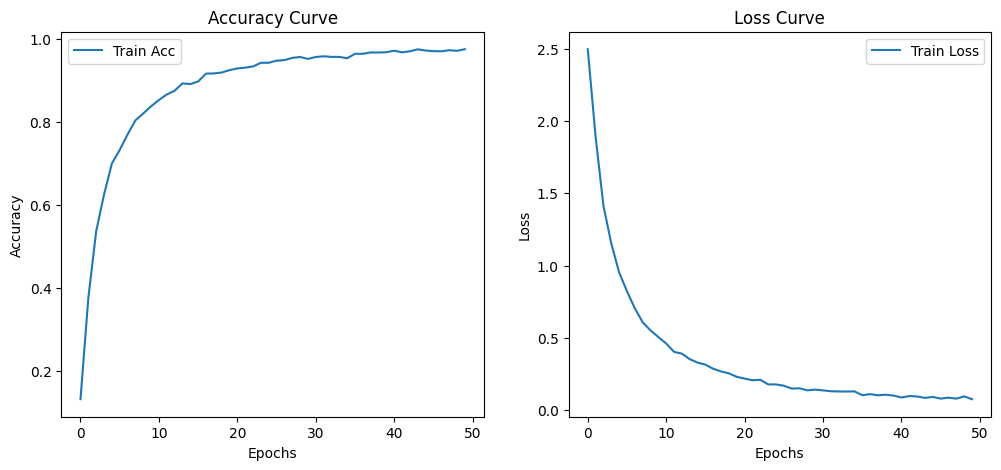

In [2]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# =====================
# Paths
# =====================
data_path = "/kaggle/input/paddy-leaf-small/Small-80"
train_dir = os.path.join(data_path, "train")
test_dir = os.path.join(data_path, "test")

# =====================
# Data Generators
# =====================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_gen.num_classes

# =====================
# Model
# =====================
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Fine-tune only last few layers
for layer in base_model.layers[:-40]:
    layer.trainable = False
for layer in base_model.layers[-40:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# =====================
# Compile & Train
# =====================
model.compile(optimizer=Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

callbacks = [
    ReduceLROnPlateau(monitor="loss", factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor="loss", patience=8, restore_best_weights=True),
    ModelCheckpoint("xception_paddy.h5", save_best_only=True, monitor="accuracy", mode="max", verbose=1)
]

history = model.fit(
    train_gen,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

# =====================
# Evaluate on Test Set
# =====================
test_loss, test_acc = model.evaluate(test_gen, verbose=1)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

# =====================
# Confusion Matrix & Classification Report
# =====================
y_true = test_gen.classes
y_pred = np.argmax(model.predict(test_gen), axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.title("Confusion Matrix - Xception")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# =====================
# Accuracy & Loss Curves
# =====================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.title("Loss Curve")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [7]:
from tensorflow.keras.models import load_model

# Reload the model
loaded_model = load_model("/kaggle/working/xception_paddy_final.h5")

# Evaluate again on test set
loss, acc = loaded_model.evaluate(test_gen, verbose=1)
print(f"🔁 Reloaded Model Test Accuracy: {acc*100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.9056 - loss: 0.4011
🔁 Reloaded Model Test Accuracy: 90.77%


Xception with validation

2025-08-17 04:03:21.941359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755403402.303851      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755403402.416112      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 3120 images belonging to 13 classes.
Found 1040 images belonging to 13 classes.
Found 1040 images belonging to 13 classes.


I0000 00:00:1755403429.479984      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755403429.480888      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1755403456.090519     121 service.cc:148] XLA service 0x7aa5ec004160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755403456.092337     121 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755403456.092372     121 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755403458.032946     121 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1755403467.868518     121 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1755403468.009135     121 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
I0000 00:00:1755403473.885708     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most onc

 2/98 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.0781 - loss: 2.5788

E0000 00:00:1755403480.751716     120 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1755403480.887487     120 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.0887 - loss: 2.5609
Epoch 1: val_accuracy improved from -inf to 0.13750, saving model to xception_best.h5
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.0887 - loss: 2.5608 - val_accuracy: 0.1375 - val_loss: 2.5056 - learning_rate: 1.0000e-04
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.1159 - loss: 2.5042
Epoch 2: val_accuracy improved from 0.13750 to 0.22212, saving model to xception_best.h5
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 652ms/step - accuracy: 0.1162 - loss: 2.5038 - val_accuracy: 0.2221 - val_loss: 2.3466 - learning_rate: 1.0000e-04
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.2659 - loss: 2.2151
Epoch 3: val_accuracy improved from 0.22212 to 0.40000, saving model to xception_best.h5
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 657ms/step - accuracy: 0.2664 - loss: 2.2139 - val_accuracy: 0.4000 - val_loss: 1.7869 - learning_rate: 1.0000e-04
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step -

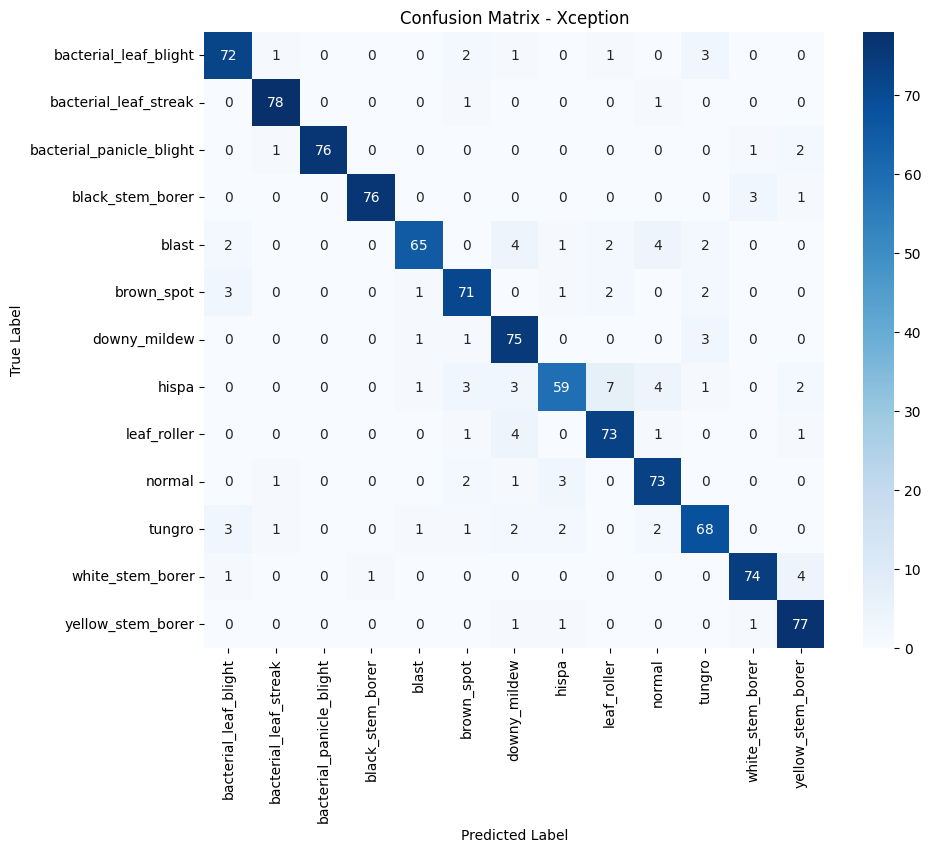

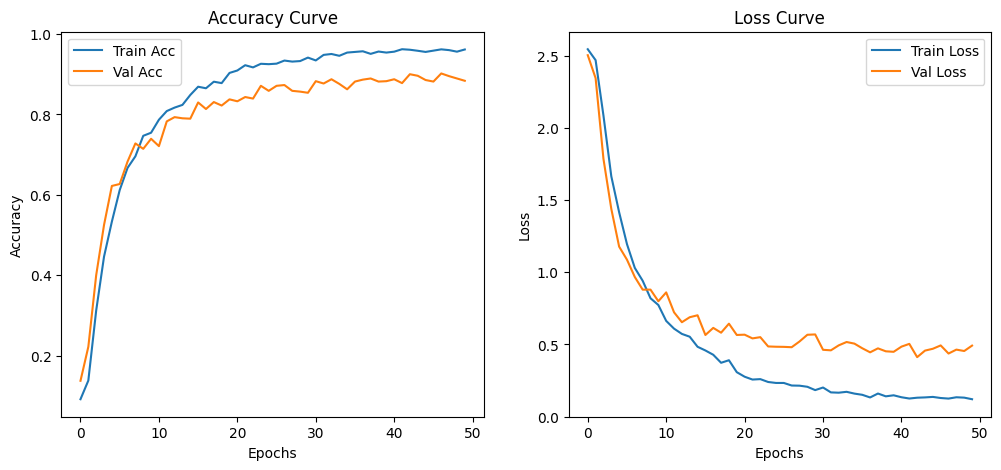

AttributeError: module 'tensorflow._api.v2.compat.v1.graph_util' has no attribute 'convert_variables_to_constants_v2_as_graph'

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import tensorflow as tf

# =====================
# Paths
# =====================
data_path = "/kaggle/input/paddy-leaf-small/Small-80"
train_dir = os.path.join(data_path, "train")   # 320 images
test_dir = os.path.join(data_path, "test")     # 80 images

# =====================
# Data Generators (60:20:20 split)
# =====================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.25  # 240 train, 80 val
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset="validation"
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_gen.num_classes

# =====================
# Model
# =====================
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Fine-tune last few layers
for layer in base_model.layers[:-40]:
    layer.trainable = False
for layer in base_model.layers[-40:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# =====================
# Compile & Train
# =====================
model.compile(optimizer=Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

callbacks = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True),
    ModelCheckpoint("xception_best.h5", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

# Save final model also
model.save("xception_final.h5")

# =====================
# Evaluate on Test Set
# =====================
test_loss, test_acc = model.evaluate(test_gen, verbose=1)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

# =====================
# Predictions & Metrics
# =====================
y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

print(f"\nPrecision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=test_gen.class_indices.keys(), 
            yticklabels=test_gen.class_indices.keys())
plt.title("Confusion Matrix - Xception")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# =====================
# Accuracy & Loss Curves
# =====================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# =====================
# GFLOPS & Params
# =====================
concrete_func = tf.function(lambda x: model(x))
concrete_func = concrete_func.get_concrete_function(tf.TensorSpec([1,224,224,3], tf.float32))
frozen_func, graph_def = tf.compat.v1.graph_util.convert_variables_to_constants_v2_as_graph(concrete_func)

flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph, options=tf.compat.v1.profiler.ProfileOptionBuilder.float_operation())
print(f"\n🔹 GFLOPS: {flops.total_float_ops/1e9:.2f}")
print(f"🔹 Parameters: {model.count_params():,}")

# =====================
# Show Sample Predictions
# =====================
class_labels = list(test_gen.class_indices.keys())
plt.figure(figsize=(12, 12))
for i in range(9):
    idx = np.random.randint(len(test_gen.filenames))
    img_path = os.path.join(test_dir, test_gen.filenames[idx])
    img = tf.keras.utils.load_img(img_path, target_size=(224,224))
    img_array = tf.keras.utils.img_to_array(img)/255.0
    pred = np.argmax(model.predict(np.expand_dims(img_array, axis=0)))
    
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(f"True: {class_labels[y_true[idx]]}\nPred: {class_labels[pred]}")
    plt.axis("off")
plt.show()
